In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score


In [2]:
datos = pd.read_csv("Mall_Customers.csv")
print("✅ Dataset cargado exitosamente!")
print(f"📊 Forma del dataset: {datos.shape}")
print("\nPrimeras 5 filas:")
print(datos.head())

✅ Dataset cargado exitosamente!
📊 Forma del dataset: (200, 5)

Primeras 5 filas:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


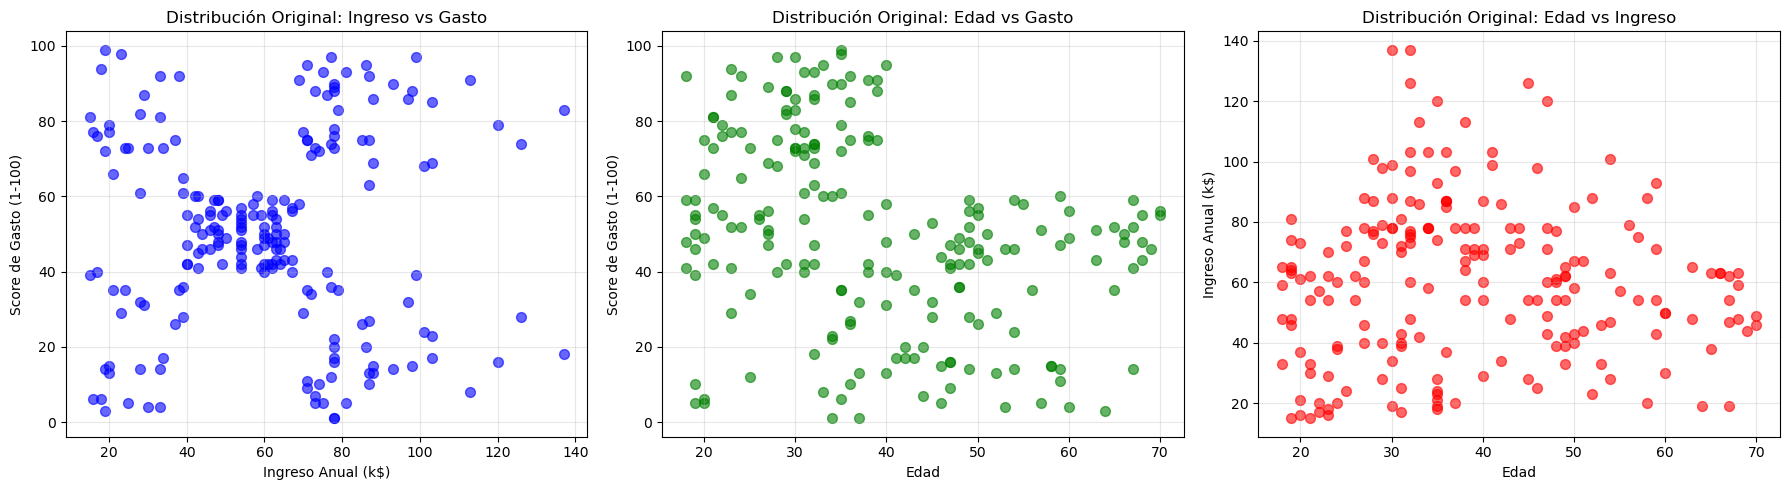

In [3]:
plt.figure(figsize=(18, 5))

# Gráfica 1: Distribución de Ingreso vs Gasto
plt.subplot(1, 3, 1)
plt.scatter(datos["Annual Income (k$)"], datos["Spending Score (1-100)"], 
           alpha=0.6, color='blue', s=50)
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Score de Gasto (1-100)')
plt.title('Distribución Original: Ingreso vs Gasto')
plt.grid(True, alpha=0.3)

# Gráfica 2: Distribución de Edad vs Gasto
plt.subplot(1, 3, 2)
plt.scatter(datos["Age"], datos["Spending Score (1-100)"], 
           alpha=0.6, color='green', s=50)
plt.xlabel('Edad')
plt.ylabel('Score de Gasto (1-100)')
plt.title('Distribución Original: Edad vs Gasto')
plt.grid(True, alpha=0.3)

# Gráfica 3: Distribución de Edad vs Ingreso
plt.subplot(1, 3, 3)
plt.scatter(datos["Age"], datos["Annual Income (k$)"], 
           alpha=0.6, color='red', s=50)
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.title('Distribución Original: Edad vs Ingreso')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



🔬 EXPERIMENTO 1: INGRESO vs GASTO - Agglomerative Clustering
🎯 Mejor k según silhouette: 5 (score: 0.5538)


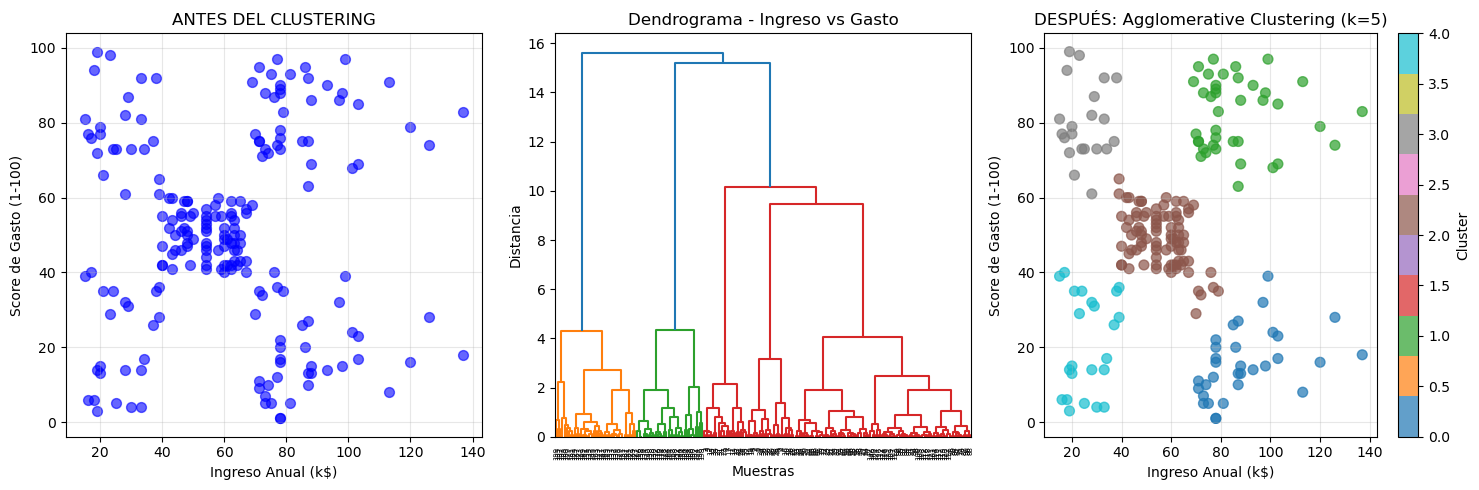

In [6]:
print("\n" + "="*60)
print("🔬 EXPERIMENTO 1: INGRESO vs GASTO - Agglomerative Clustering")
print("="*60)

# Preparar datos
X1 = datos[["Annual Income (k$)", "Spending Score (1-100)"]].values

# Estandarizar
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

# Visualización antes/después
plt.figure(figsize=(15, 5))

# ANTES
plt.subplot(1, 3, 1)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.6, color='blue', s=50)
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Score de Gasto (1-100)')
plt.title('ANTES DEL CLUSTERING')
plt.grid(True, alpha=0.3)

# Dendrograma
plt.subplot(1, 3, 2)
Z1 = linkage(X1_scaled, method='ward')
dendrogram(Z1, orientation='top')
plt.title('Dendrograma - Ingreso vs Gasto')
plt.xlabel('Muestras')
plt.ylabel('Distancia')

# Determinar mejor k automáticamente
best_silhouette = -1
best_k = 2

for k in range(2, 8):
    model = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = model.fit_predict(X1_scaled)
    silhouette_avg = silhouette_score(X1_scaled, labels)
    
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = k

print(f"🎯 Mejor k según silhouette: {best_k} (score: {best_silhouette:.4f})")

# Clustering final
model_final = AgglomerativeClustering(n_clusters=best_k, metric='euclidean', linkage='ward')
labels_final = model_final.fit_predict(X1_scaled)

# DESPUÉS
plt.subplot(1, 3, 3)
scatter = plt.scatter(X1[:, 0], X1[:, 1], c=labels_final, cmap='tab10', alpha=0.7, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Score de Gasto (1-100)')
plt.title(f'DESPUÉS: Agglomerative Clustering (k={best_k})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



🔬 EXPERIMENTO 2: EDAD vs GASTO - Agglomerative Clustering
🎯 Mejor k según silhouette: 3 (score: 0.4166)


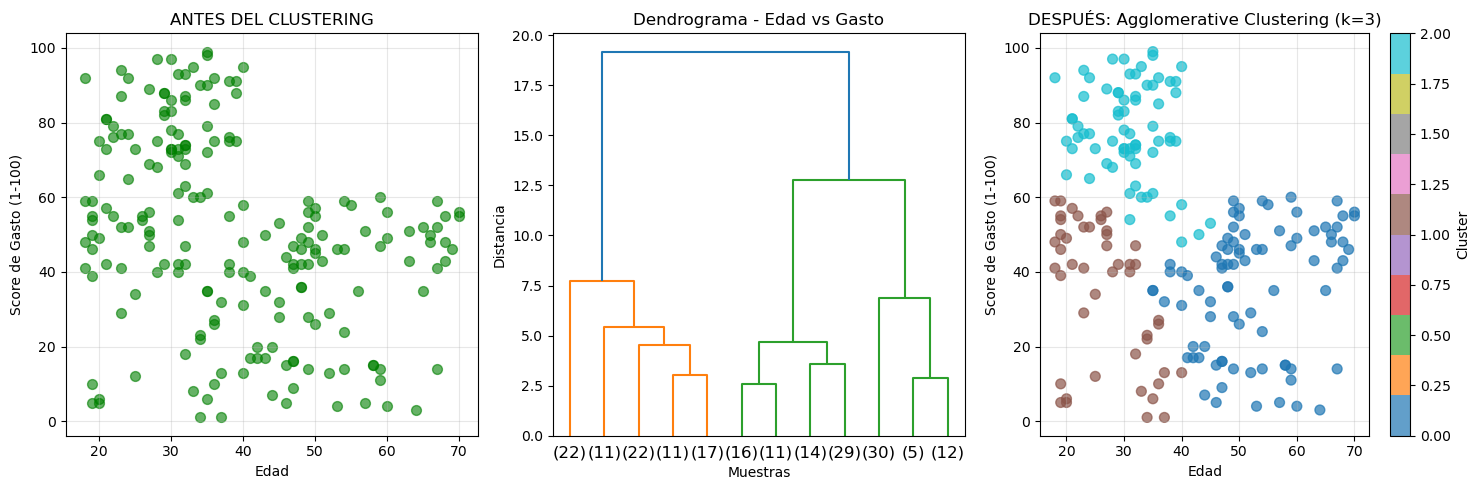

In [7]:
print("\n" + "="*60)
print("🔬 EXPERIMENTO 2: EDAD vs GASTO - Agglomerative Clustering")
print("="*60)

# Preparar datos
X2 = datos[["Age", "Spending Score (1-100)"]].values

# Estandarizar
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

# Visualización antes/después
plt.figure(figsize=(15, 5))

# ANTES
plt.subplot(1, 3, 1)
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.6, color='green', s=50)
plt.xlabel('Edad')
plt.ylabel('Score de Gasto (1-100)')
plt.title('ANTES DEL CLUSTERING')
plt.grid(True, alpha=0.3)

# Dendrograma
plt.subplot(1, 3, 2)
Z2 = linkage(X2_scaled, method='ward')
dendrogram(Z2, orientation='top', truncate_mode='lastp', p=12)
plt.title('Dendrograma - Edad vs Gasto')
plt.xlabel('Muestras')
plt.ylabel('Distancia')

# Determinar mejor k automáticamente
best_silhouette = -1
best_k = 2

for k in range(2, 8):
    model = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = model.fit_predict(X2_scaled)
    silhouette_avg = silhouette_score(X2_scaled, labels)
    
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = k

print(f"🎯 Mejor k según silhouette: {best_k} (score: {best_silhouette:.4f})")

# Clustering final
model_final = AgglomerativeClustering(n_clusters=best_k, metric='euclidean', linkage='ward')
labels_final = model_final.fit_predict(X2_scaled)

# DESPUÉS
plt.subplot(1, 3, 3)
scatter = plt.scatter(X2[:, 0], X2[:, 1], c=labels_final, cmap='tab10', alpha=0.7, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Edad')
plt.ylabel('Score de Gasto (1-100)')
plt.title(f'DESPUÉS: Agglomerative Clustering (k={best_k})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



🔬 EXPERIMENTO 3: EDAD vs INGRESO - Agglomerative Clustering
🎯 Mejor k según silhouette: 3 (score: 0.3922)


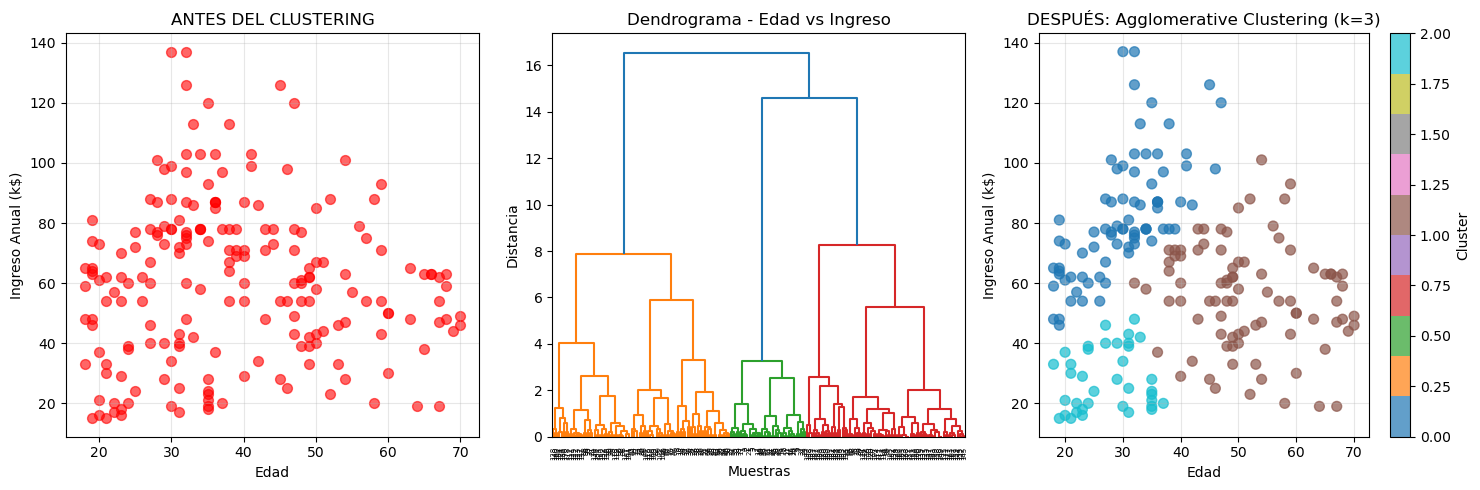

In [11]:
print("\n" + "="*60)
print("🔬 EXPERIMENTO 3: EDAD vs INGRESO - Agglomerative Clustering")
print("="*60)

# Preparar datos
X3 = datos[["Age", "Annual Income (k$)"]].values

# Estandarizar
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)

# Visualización antes/después
plt.figure(figsize=(15, 5))

# ANTES
plt.subplot(1, 3, 1)
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.6, color='red', s=50)
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.title('ANTES DEL CLUSTERING')
plt.grid(True, alpha=0.3)

# Dendrograma
plt.subplot(1, 3, 2)
Z3 = linkage(X3_scaled, method='ward')
dendrogram(Z3, orientation='top')
plt.title('Dendrograma - Edad vs Ingreso')
plt.xlabel('Muestras')
plt.ylabel('Distancia')

# Determinar mejor k automáticamente
best_silhouette = -1
best_k = 2

for k in range(2, 8):
    model = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = model.fit_predict(X3_scaled)
    silhouette_avg = silhouette_score(X3_scaled, labels)
    
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = k

print(f"🎯 Mejor k según silhouette: {best_k} (score: {best_silhouette:.4f})")

# Clustering final
model_final = AgglomerativeClustering(n_clusters=best_k, metric='euclidean', linkage='ward')
labels_final = model_final.fit_predict(X3_scaled)

# DESPUÉS
plt.subplot(1, 3, 3)
scatter = plt.scatter(X3[:, 0], X3[:, 1], c=labels_final, cmap='tab10', alpha=0.7, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.title(f'DESPUÉS: Agglomerative Clustering (k={best_k})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()